## Machine Learning Notebook

### Day #1

1.  **Supervised Learning** <br>
    Learns from data labled with right answer.
    
    The two major types of supervised learning our regression and classification.
    
    **Regression**
    - Predicts a number.
    - Has infinite outputs.
     
     <br>
    
    **Classification**
    - Predicts categories.
    - Has small number of outputs. <br>
    <br>
3.  **Unsupervised Learning** <br>
    Finds something interesting in unlabled data.
    
    An unsupervised learning algorithm, might decide that the data can be assigned to two different groups or two different clusters. This is a particular type of unsupervised learning, called a **clustering** algorithm.


    <div class="alert alert-block alert-info"> <b>Note:</b> Whereas in supervised learning, the data comes with both inputs x and input labels y, in unsupervised learning, the data comes only with inputs x but not output labels y. </div>

### Day #2

**Regression Model** <br>
Let us make our own model similar to the one given in the course.

1.  **Data Table** <br>
   The data comprises a set of inputs and outputs. This data is also called a training set. <br>
   **Notation:** Input variables are also called x or feature. Similarly output variables are called y or target.

    Let's try to model fuel consumption of a car. In this case kilometers will be our input(x) values and liters(y) will be our output values.

| Kilometers   | Fuel(Liters)    |    
| -------------| ----------|
| 156          | 7.8       |
| 300          | 12.7      |
| 46           | 3.4       |

-  **Number of Elements ($m$):** Number of training elements in our case $m = 3$.
-  **$(x^{(i)}$, $y^{(i)})$:** $\;$ $i_{th}$Training Example. For $i = 1$ we will get $(x^{(1)}$, $y^{(1)})$ $= (300, 12.7)$ assuming indexed as (0,1,2..).

    We can store these values in a numpy array.


In [11]:
import numpy as np

i = 0

x = np.array([156, 300, 46])
y = np.array([7.8, 12.7, 3.4])

m = len(x)

x_i = x[i]
y_i = y[i]

print(f"Input values {x}")
print(f"Output values {y}")

# m value
print(f"Number of training examples is: {m}")

# i_th training element
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

Input values [156 300  46]
Output values [ 7.8 12.7  3.4]
Number of training examples is: 3
(x^(0), y^(0)) = (156, 7.8)


2. **Learning Algorithm** <br>
    To train the model, we will feed both input features and output targets into our learning algorithm. Then our learning algorithm will produce a **function.** This functions job is to take a new x input and output an estimation **(ŷ)** .

<pre>                                                        x <span>&#8594;</span> f <span>&#8594;</span> ŷ                                      
                                               kilometers <span>&#8594;</span> f <span>&#8594;</span> litres (estimated)                          </pre>
- **Function** <br>
    To keep it simple we will consider our function as a straight line. Now we can represent f as $f(x) = wx + b$ <br>
    In our case, function has only one variable. And it is a lineer function. This type of regression is called **Univariate Lineer Regression.**

    Let's use Matplotlib to see our model on a chart.

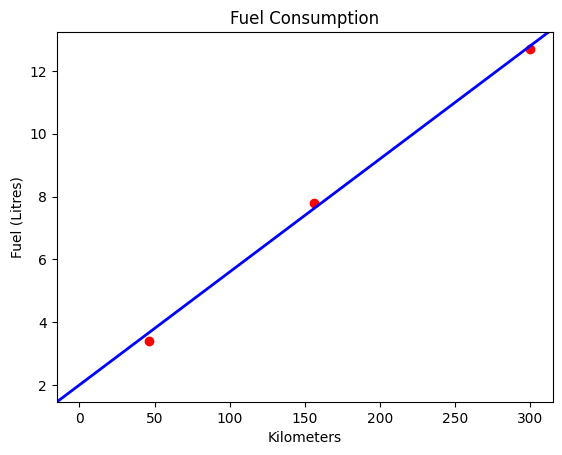

In [12]:
import matplotlib.pyplot as plt

# For now let's define w,b values ourselves.
w = .036
b = 2

# Plot the data points
plt.scatter(x, y, marker='o', c='r')
# Set the title
plt.title("Fuel Consumption")
# Set the y-axis label
plt.ylabel('Fuel (Litres)')
# Set the x-axis label
plt.xlabel('Kilometers')

# We need one point and the slope of the line to draw it on the chart
plt.axline((0, b), slope=w, linewidth=2, color='b')

plt.show()


Now that we have a model, we can use it to make a prediciton. Let's say we want to know how much fuel we use for hundred kilometers.

In [13]:
kilometers = 100

#We use our f function
fuel_needed = w*kilometers + b

print(f"Fuel needed for {kilometers} kilometers is {fuel_needed} litres")

Fuel needed for 100 kilometers is 5.6 litres


### Day #3

**Cost Function** <br>
    Yesterday when we made the model, we defined $w, b$ values (coefficients) ourselves. Now the question is how do you find values for $w$ and $b$ so that the prediction $ŷ^i$ is close to the true target $y^i$ for many or maybe all training examples $x^i, y^i$. To answer that question, let's first take a look at how to measure how well a line fits the training data. We can use a cost function to tell how well a line fits the training data.

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- Lets visualize what cost function looks like on graph.
   

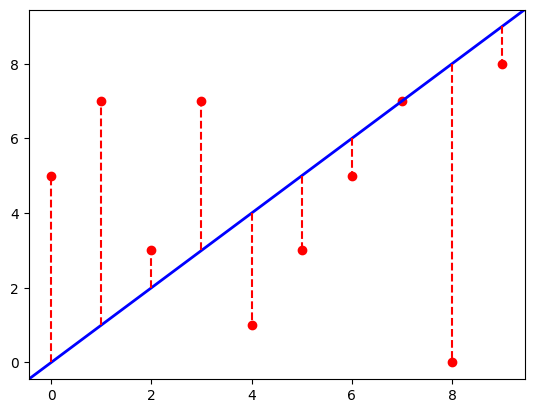

Value of the cost function is: 7.85


In [14]:
# Number of elements
m = 10

# Dataset: x values starting from 0 to m and y values ranging from 0 to 10
x = np.arange(m)
y = np.random.randint(10, size=m)

# Coefficients
w,b = 1,0

# Plot the data points
plt.scatter(x, y, marker='o', c='r')

# Plot the function
plt.axline((0, b), slope=w, linewidth=2, color='b')

cost = 0
# Calcuate the cost function
for i in range(m):
    f = w*x[i] + b # ŷ value
    _cost = (f - y[i]) ** 2
    cost = cost + _cost
    # Lets draw a line to examine the error value |ŷ - y|
    c_x = (x[i], y[i])
    c_y = (x[i], f)
    plt.plot(c_y, c_x, linestyle = "dashed", color = "r")
cost = cost / (2 * m)

plt.show()

print(f"Value of the cost function is: {cost}")

Dashed lines you see in the charts are called **error**. This function is also called the squared error cost function, the reason we call it squared error function is that we're taking the square of these error terms. $J$ is the cost function that measures how big the squared errors are, so choosing $w$ that minimizes these squared errors, makes them as small as possible, will give us a good model.

<div class="alert alert-block alert-info"> <b>Note: </b>To build a cost function that doesn't automatically get bigger as the training set size gets larger by convention, we will compute the average squared error instead of the total squared error and we do that by dividing by $m$. </div>

- Now let's examine change of $J$ respective to coefficients. Because we have two independent variables we will have a 3D graph. $x-axis$ and $y-axis$ representing the $w, b$ values, and $z-axis$ will be the value of $J$.

- Let's use the same dataset given in the course. We will plot without external libraries only using matplotlib.

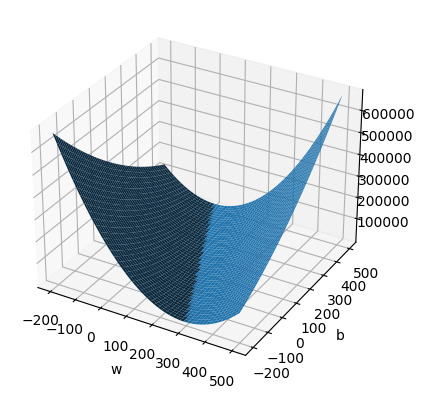

In [15]:
# Dataset given in course
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

m = len(x_train)

# Function for calculating J(w,b)
def CalculateCost(w, b):
    cost = 0
    for i in range(m):
        f = w*x_train[i] + b
        _cost = (f - y_train[i]) ** 2
        cost = cost + _cost
    cost = cost / (2 * m)
    return cost

# Interval where we want to examine the change of J(w,b)
w = np.arange(-200, 500, 1)
b = np.arange(-200, 500, 1)

# Creating the grid and setting Z values to output of CalculateCost
W, B = np.meshgrid(w, b)
Z = CalculateCost(W, B)

# Drawing the plot
fig = plt.figure()
ax = plt.subplot(projection="3d")
ax.plot_surface(W, B, Z)
plt.xlabel('w')
plt.ylabel('b')
plt.show()

<br>
Now, in order to look even more closely at specific points, there's another way of plotting the cost function $J$ that would be useful for visualization, which is, rather than using these 3D-surface plots, plot it using a contour plot.
<br>
<br>

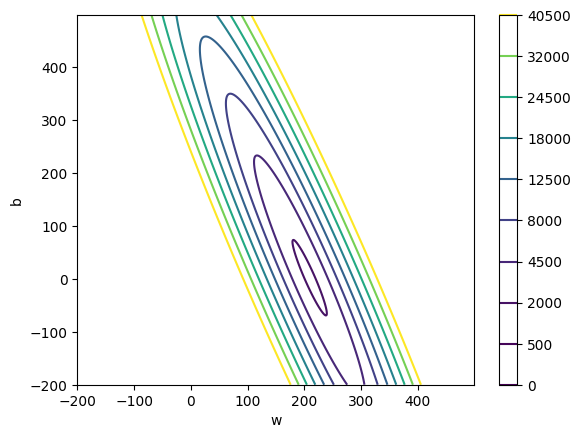

In [16]:
plt.contour(W, B, Z, levels=[l*l*500 for l in range (10)])
plt.colorbar()
plt.xlabel('w')
plt.ylabel('b')
plt.show()

Because we are trying to *minimize* the cost function, we can choose the center of this concentric ovals.

### Day #4

**Gradient Descent** <br>
    Yesterday we saw how different $w, b$ values alter the cost function $J$. Now we will look at a more systematic way to find $w, b$ values corresponding to the smallest cost possible. We can use an algorithm called gradient descent to achieve this.

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}\; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

- **Learning Rate ($\alpha$)**: Learning rate controls how big of a step you take when updating the model's parameters, w and b.

- **Derivative Term ($\frac{\partial J(w,b)}{\partial w}$):** We use partial derivative to find the rate of change of the function at a given point.

Let's assume $b$ is equal to $0$, now we have one parameter($w$) instead of two, we can look at two-dimensional graph of the cost function $J$, instead of a three dimensional graph. Let's look at what gradient descent does on just function $J(w)$. Horizontal axis will be parameter $w$, and the vertical axis will be the cost $J(w)$.


**Instructions:** <br>
- Run the first block of code once
- Then run the second block of code as many times as you like

In [17]:
# We need random module for generating random numbers
import random

# Values for initialization
iterations = 0;
x_interval = 25
point = random.randint(-x_interval, x_interval)
a = .1 # Learning Rate

# Coordinates for drawing function y = x^2
x_cords = range(-x_interval,x_interval)
y_cords = [x**2 for x in x_cords]

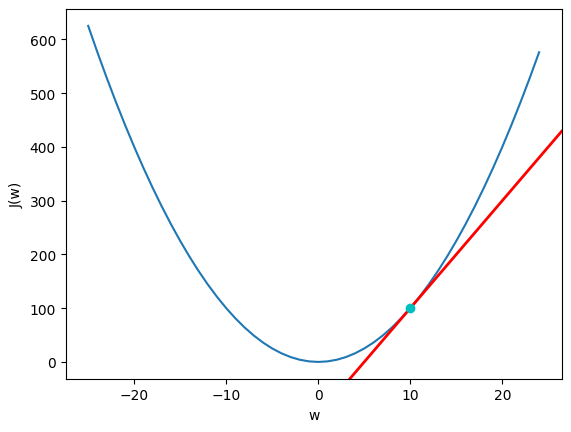

Starting gradient descent at point (10,100)


In [18]:
plt.ylabel('J(w)')
plt.xlabel('w')
plt.plot(x_cords, y_cords)
plt.axline((point, point**2), slope=2*point, linewidth=2, color='r') # Plot tangent line
plt.plot(point, point**2, 'co') # Plot current point for i_th iteration
plt.show()

if iterations == 0:
    print(f"Starting gradient descent at point ({point},{point**2})")
else:
    point = point - a*2*point
    print(f"For iteration number {iterations}, point is at ({point},{point**2})")

iterations = iterations + 1

<br>
This example shows the intuition behind what a derivative term does and how gradient descent change $w$ to get you closer to the minimum.

### Day #5

Today we will implement gradient descent. You can find the code for linear regression *[here](LinearRegressionModel/Models.py)*. Now let's examine what our algorithm does.

For constructing <code>LinearRegression</code> class we will need two parameters.

- $x$ (feature) values
- $y$ (target) values

After constructing an instance of our class. We can call function <code>gradient_descent</code> . Which takes four parameters.

- starting $w$ value
- starting $b$ value
- $\alpha$
- number of iterations

If we were to examine the output of *[Main.py](LinearRegressionModel/Main.py)* we can see how cost function changes overtime.



Lets visualize change of the cost function. <a id='costfunction_graph'></a>

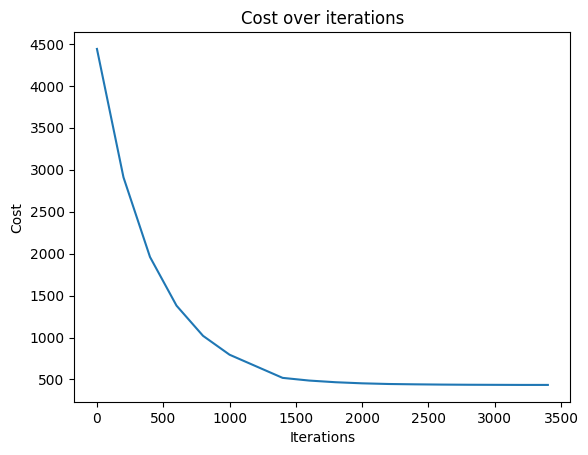

In [19]:
x = np.arange(18) * 200
y = np.array([4.44e+03, 2.91e+03, 1.96e+03, 1.38e+03, 1.02e+03, 7.95e+02, 6.57e+02, 5.19e+02, 4.87e+02, 4.67e+02, 4.54e+02, 4.46e+02, 4.42e+02, 4.39e+02, 4.37e+02, 4.36e+02, 4.35e+02, 4.35e+02])

plt.plot(x, y)
plt.title("Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

And finally we can see what our function looks like.

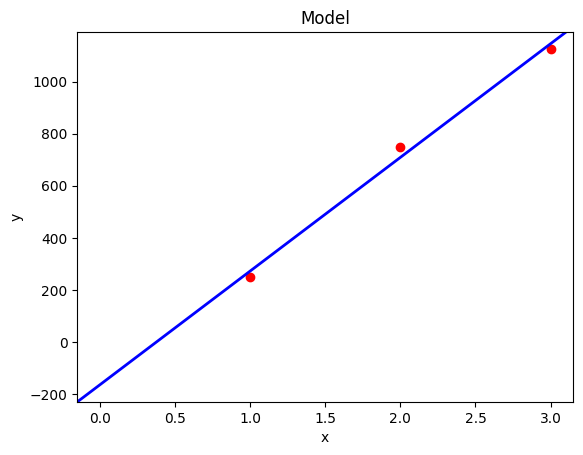

In [20]:
# Our training set
x = np.array([1, 2, 3])
y = np.array([250, 750, 1125])

# w, b values we got from gradient_descent
w = 436.4223239574076
b = -164.21685571445073

plt.scatter(x, y, marker='o', c='r')
plt.title("Model")
plt.ylabel('y')
plt.xlabel('x')

# Line representing function.
plt.axline((0, b), slope=w, linewidth=2, color='b')

plt.show()

### Day #6

**Linear Regression With Multiple Variables** <br>
So far we only had one feature ($x$) variable. Now we will learn how to implement linear regression with more than one variable. Previously our model was : $ f(x) = wx + b$ now that we have multiple variables it will be: $f(\vec{x}) = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + ... +  w_nx_n + b$ <br>

Let's take the same training set given in course.

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178      |  

- $x_j$ = $j^{th}$ feature
- $n$ = number of features
- $x^{(i)}$ = features of $i^{th}$ training example
- $x^{(i)}_j$ = value of feature $j$ in $i^{th}$ training example

We can write features as $\vec{x} = (x_1,x_2,x_3,x_4,..,x_n)$ and similarly we can write $\vec{w} = (w_1,w_2,w_3,w_4,..,w_n)$. And using these two vectors we can write $f(\vec{x}) = <\vec{w},\vec{x}> + b$

<div class="alert alert-block alert-warning"> <b>Notation:</b> $<a,b>$ stands for dot product of $a,b$. </div>

**Feature Scaling** <br>
The key point of feature scaling is to rescale feature values so they have compareable range of values. Feature scaling also enables gradient descent to run much faster.

Let's say a ranges from $a$ to $b$. $(a\le x \le b)$

Let's assume $300<x_1<2000$ and $0<x_2<5$ how can we scale these values.

1. **Dividing by the maximum** <br>
We divide these expressions by their maximum value. <br>
$\frac{a}{max}<x_{1(scaled)}<\frac{b}{max}$ <br>
*Ex:* 
$\frac{300}{2000}<x_{1(scaled)}<\frac{2000}{2000}$ we get $0.15<x_{1(scaled)}<1$ similarly $0<x_{2(scaled)}<1$

3. **Mean normalization** <br>
We start with the original features and then we re-scale them so that both of them are centered around zero. (Mean normalization may result in negative values). <br>
First we need to calculate mean $(\mu)$. <br>
$\frac{a - \mu}{max - min} \le x \le \frac{b - \mu}{max - min}$ <br>
*Ex:* Let's assume $\mu_1 = 600$, $\frac{300 - 600}{2000 - 300} \le x_1 \le \frac{2000 - 600}{2000 - 300}$ we get $-0.18<x_1<0.82$ similarly $-0.46<x_2<0.54$

5. **Z-score normalization** <br>
First we need to calculate standart deviation $(\sigma)$. <br>
$\frac{a - \mu}{\sigma} \le x \le \frac{b - \mu}{\sigma}$ <br>
*Ex:* Let's assume $\mu_1 = 600$, $\sigma = 450$ <br>, $\frac{300 - 600}{450} \le x_1 \le \frac{2000 - 600}{450}$ we get $-0.67<x_1<3.1$ similarly $-1.6<x_2<1.9$




**Checking Gradient Descent For Convergence** <br>
Here's something that we can do to make sure that gradient descent is working well. Recall that the job of gradient descent is to find parameters $w$ and $b$ that minimizes the cost function $J$. We can plot $J(w,b)$ at each iteration as we did [**here.**](#costfunction_graph) As you can see in the graph  $J(w,b)$ likely converged by 4000 iterations. <br>

Another way to decide when your model is done training is with an automatic convergence test. Let $\epsilon = 10^{-3}$ if $J(w,b)$ decreases less then $\epsilon$ declare convergance.

<div class="alert alert-block alert-info"> <b>Note: </b> We can adjust learning rate $\alpha$ by looking at the graph of cost function $j$. </div>

**Feature engineering** <br>
The choice of features can have a huge impact on your learning algorithm's performance. In fact, for many practical applications, choosing or entering the right features is a critical step to making the algorithm work well. Let's take a look at feature engineering by making a similar model given in course.

<img align="left" src="./images/tv.png" width="500"> <br> Let's say a TV brand is trying to price their upcoming model depending on the height and width. $f(\vec{x}) = w_1x_1 + w_2x_2 + b$ ( $x_1, x_2$ are height and width respectievly.)<br><br> We may have an intuition that the inch of the screen is more predictive of the price, than the height and width as separate features. <br><br> $d_{inch} = \frac{d_{cm}}{2.54}$ Because length of screens are represented as diagonal, we need to calculate root sum square. And we will have a new $x_3$ feature. <br><br>

$x_3 = \frac{\sqrt{x_1^2 + x_2^2}}{2.54}$ for example given on the left, $x_3 = 39.3700787402$ <br><br>
We can then rewrite $f(\vec{x})$ as $ w_1x_1 + w_2x_2 + w_3x_3 + b$

**Polynomial regression** <br>
So far we've just been fitting straight lines to our data. Let's take the ideas of multiple linear regression and feature engineering to come up with a new algorithm called polynomial regression, which will let you fit curves, non-linear functions, to our data.

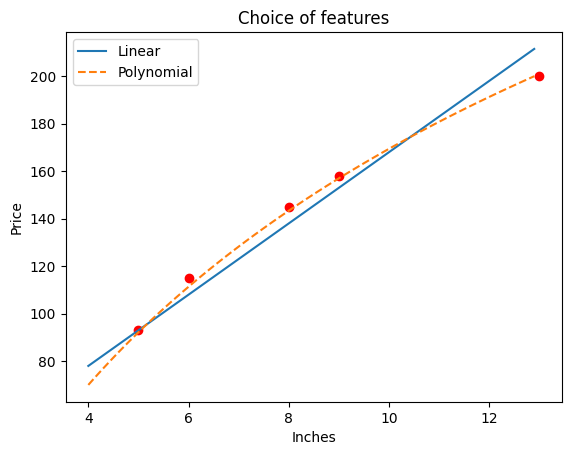

In [169]:
import math

# Inches and prices
x = np.array([5, 6, 8, 9, 13])
y = np.array([93, 115, 145, 158, 200])

# Range for plotting
x_range = np.arange(4, 13, .1)
y_range = x_range**4

# w.x + b
w_linear = 15
b_linear = 18

# w_1.x + w_2.sqrt(x) + b
w_polynomial_1 = -9
w_polynomial_2 = 132
b_polynomial = -158

# Functions
linear = w_linear * x_range + b_linear
polynomial = w_polynomial_1 * x_range + w_polynomial_2 * np.sqrt(x_range) + b_polynomial

plt.plot(x_range, linear, label = 'linear')
plt.plot(x_range, polynomial, label = 'polynomial', linestyle = 'dashed')

plt.scatter(x, y, marker='o', c='r')
plt.title("Choice of features")
plt.ylabel('Price')
plt.xlabel('Inches')
plt.legend(['Linear','Polynomial'])
plt.show()

As you can see in the chart above, by using feature engineering and polynomial functions, you can potentially get a much better model for your data. In this particular example $f(x) = w_1x + w_2\sqrt{x} + b$ perfrom better than $f(x) = wx + b$.